In [4]:
import cv2
from colour_checker_detection import detect_colour_checkers_segmentation
import numpy as np

# def read_img(img_path):
#     # to BGR to RGB
#     # 讀中文檔名
#     img = cv2.imdecode(np.fromfile(file=img_path, dtype=np.uint8), cv2.IMREAD_COLOR)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255
#     return img

In [5]:
# img = read_img("1.jpg")
        
# colour_checker_swatches_data = detect_colour_checkers_segmentation(img, additional_data=True)[0]
# # swatch_colours, colour_checker_image, swatch_masks = (colour_checker_swatches_data.values)
# colour_checker_swatches_data

In [6]:
from colour import read_image
img = read_image("1.jpg")
# print(img)
detect_colour_checkers_segmentation(img)

c:\Users\s830s\AppData\Local\Programs\Python\Python310\lib\site-packages\colour\utilities\verbose.py:266: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


[]

In [10]:
import glob

COLOUR_CHECKER_IMAGE_PATHS = glob.glob('*.jpg')
COLOUR_CHECKER_IMAGE_PATHS

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']

c:\Users\s830s\AppData\Local\Programs\Python\Python310\lib\site-packages\colour\utilities\verbose.py:266: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


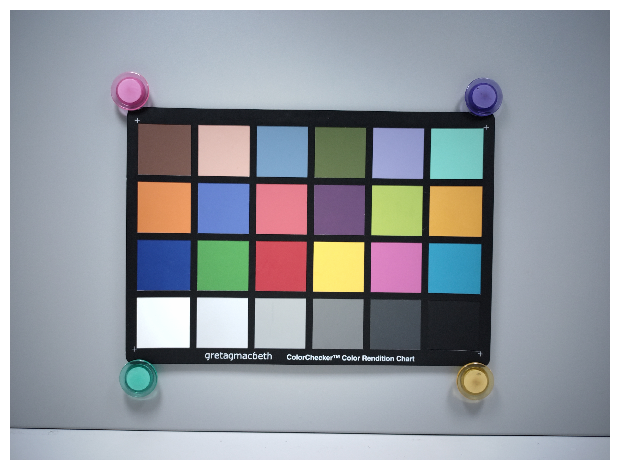

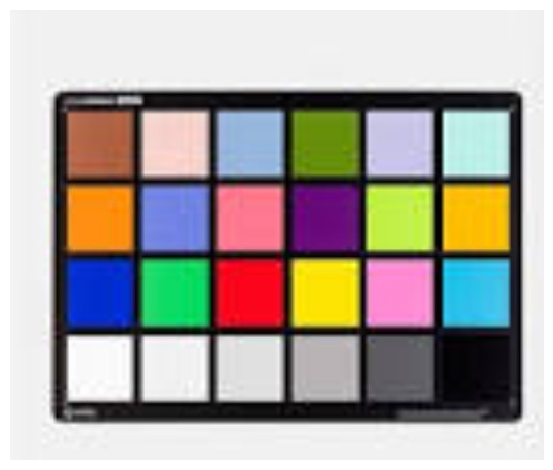

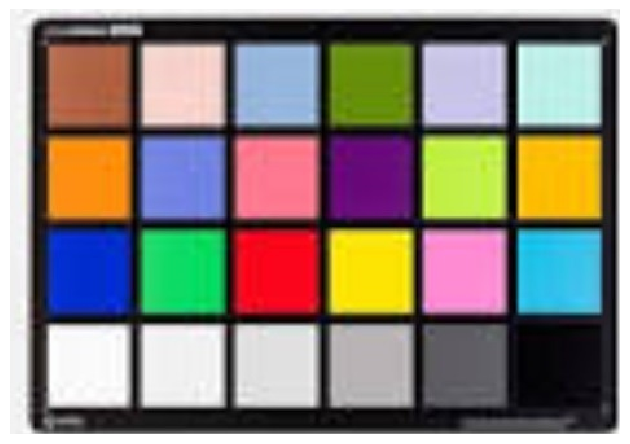

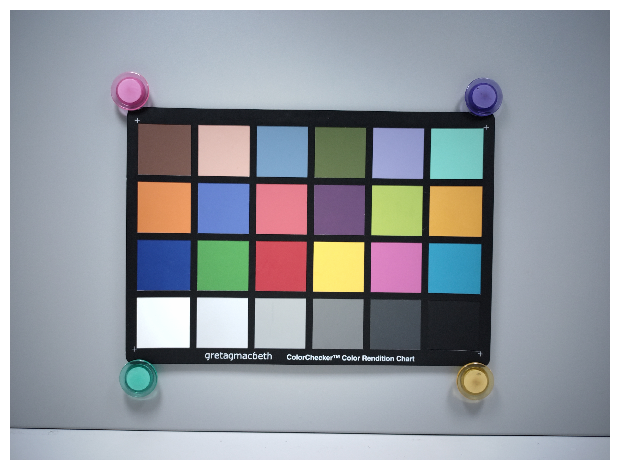

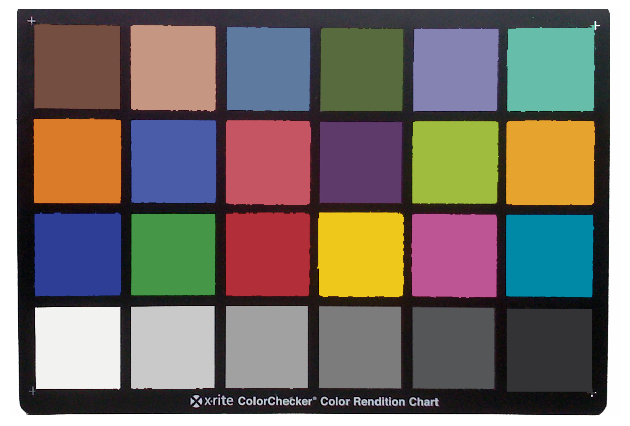

In [11]:
import colour

COLOUR_CHECKER_IMAGES = [
    colour.cctf_decoding(colour.io.read_image(path))
    for path in COLOUR_CHECKER_IMAGE_PATHS
]

for image in COLOUR_CHECKER_IMAGES:
    colour.plotting.plot_image(colour.cctf_encoding(image))

In [12]:
SWATCHES = []
for image in COLOUR_CHECKER_IMAGES:
    for colour_checker_swatches_data in detect_colour_checkers_segmentation(
        image, additional_data=True):
        swatch_colours, colour_checker_image, swatch_masks = (
            colour_checker_swatches_data.values)
        SWATCHES.append(swatch_colours)
        
        # Using the additional data to plot the colour checker and masks.
        masks_i = np.zeros(colour_checker_image.shape)
        for i, mask in enumerate(swatch_masks):
            masks_i[mask[0]:mask[1], mask[2]:mask[3], ...] = 1
        colour.plotting.plot_image(
            colour.cctf_encoding(
                np.clip(colour_checker_image + masks_i * 0.25, 0, 1)));

AttributeError: 'ColourCheckerSwatchesData' object has no attribute 'values'